Get NEXRAD data from AWS, get severe reports from SPC archive, and plot a loop of them! Here we use the August 2020 derecho as an example
------------

#### Pulling radar data follows from: https://nexradaws.readthedocs.io/en/latest/Tutorial.html
#### Radar plotting follows from:  https://github.com/ARM-DOE/pyart/blob/master/examples/plotting/plot_ppi_with_rings.py

In [ ]:
#We may need this library https://pypi.org/project/nexradaws/  skip for now
#!pip install nexradaws

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates

import cartopy.crs as ccrs
import pyart
import pandas as pd

import nexradaws
import tempfile
import pytz

templocation = tempfile.mkdtemp()

import cartopy.feature as cfeature
from metpy.plots import USCOUNTIES


### Get NEXRAD data. This code was pulled from Russ Schumacher's GitHub page at 
###  https://github.com/russ-schumacher/ats641_spring2022/blob/master/example_notebooks/pyart_nexrad_maps_reports.ipynb

In [ ]:
### Define the radar, start time and end time
radar_id = 'KDVN'
#DRL For additional radar ID's see: https://www.weather.gov/media/tg/wsr88d-radar-list.pdf

#Set start and end time for the derecho using pandas date/time stamp
start = pd.Timestamp(2020,8,10,16,30).tz_localize(tz='UTC')
end   = pd.Timestamp(2020,8,10,17,00).tz_localize(tz='UTC')
#end   = pd.Timestamp(2020,8,10,21, 0).tz_localize(tz='UTC')  Full event

### Bounds of map we want to plot
min_lon = -93.25
max_lon = -88.
min_lat = 40.35
max_lat = 43.35

# AWS radar bucket 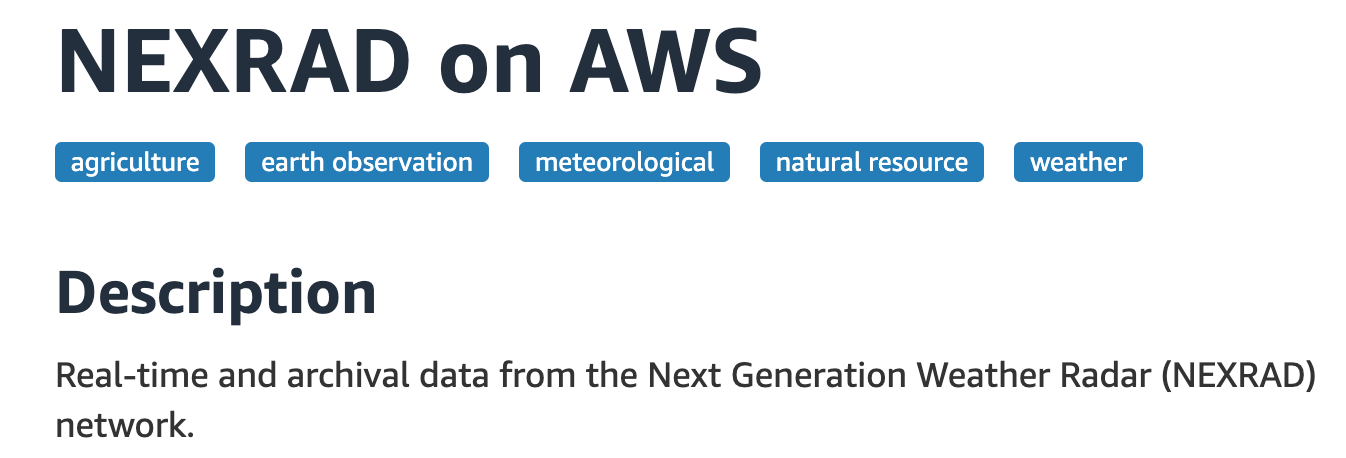 
## For bucket info see https://github.com/awslabs/open-data-docs/tree/main/docs/noaa/noaa-nexrad 
## To surf the bucket, select the 'Browse Bucket' hyperlink!

In [ ]:
!pwd

In [ ]:
#### Pull the KDVN data from the AWS level II radar archive bucket (this is quite a bit of data!)
conn = nexradaws.NexradAwsInterface()
scans = conn.get_avail_scans_in_range(start, end, radar_id)
print("There are {} scans available between {} and {}\n".format(len(scans), start, end))
print(scans[0:4])

## download these files
results = conn.download(scans, templocation)

### Now get the severe reports from the SPC site. This assumes you're plotting a year far enough in the past that SPC has official records available. If plotting a more recent time period, then the local storm reports archive at IEM (Iowa Environmental Mesonet) is a good source (see https://mesonet.agron.iastate.edu/archive/).

In [ ]:
### wind reports
path = "https://www.spc.noaa.gov/wcm/data/"

#Convert to date/time and set index to datetime


### times in the file are given in central standard time (UTC+6). Localize, and convert to UTC


## subset down to 30 minutes before/after the radar times we're plotting



In [ ]:
### repeat for tornado reports
tor_rpts = pd.read_csv(path+str(start.year)+"_torn.csv")

tor_rpts['datetime'] = pd.to_datetime(tor_rpts.date + ' ' + tor_rpts.time) ## convert to datetime
tor_rpts.set_index("datetime",inplace=True)

# ### times in the file are given in central standard time (UTC+6). Localize, and convert to UTC
tor_rpts.index = tor_rpts.index.tz_localize("Etc/GMT+6",ambiguous='NaT',nonexistent='shift_forward').tz_convert("UTC")

#DRL This doesn't work for some reason
# ## subset down to 30 minutes before/after the radar times we're plotting
#tor_rpts = tor_rpts[((start-pd.Timedelta(minutes=30)).strftime("%Y-%m-%d %H:%M")):((end+pd.Timedelta(minutes=30)).strftime("%Y-%m-%d %H:%M"))]

tor_rpts

In [ ]:
### repeat for hail
hail_rpts = pd.read_csv(path+str(start.year)+"_hail.csv")

hail_rpts['datetime'] = pd.to_datetime(hail_rpts.date + ' ' + hail_rpts.time) ## convert to datetime
hail_rpts.set_index("datetime",inplace=True)

### times in the file are given in central standard time (UTC+6). Localize, and convert to UTC
hail_rpts.index = hail_rpts.index.tz_localize("Etc/GMT+6",ambiguous='NaT',nonexistent='shift_forward').tz_convert("UTC")

## subset down to 30 minutes before/after the radar times we're plotting
hail_rpts = hail_rpts[((start-pd.Timedelta(minutes=30)).strftime("%Y-%m-%d %H:%M")):((end+pd.Timedelta(minutes=30)).strftime("%Y-%m-%d %H:%M"))]
hail_rpts

In [ ]:
#Sort the data from above
hail_rpts = hail_rpts.sort_index()
tor_rpts  = tor_rpts.sort_index()
wind_rpts = wind_rpts.sort_index()

### Now, plot the maps (reflectivity with severe reports)

In [ ]:
#Loop through the data!

for i, scan in enumerate(results.iter_success(), start=1):
    if scan.filename[-3:] != "MDM":

        print(str(i))
        print("working on "+scan.filename)

        #PANDAS to datetime
        

        # Read radar
   

        # -------------------------------
        # One figure with overlay
        # -------------------------------
        fig = plt.figure(figsize=(8, 12))
        ax = plt.axes(projection=ccrs.PlateCarree())

        # Plot radar reflectivity
        display.plot_ppi_map(      )

        # Overlay storm reports
        ax.scatter()
        ax.scatter()
        ax.scatter()

        # Add legend
        ax.legend()

        # Save figure
        overlay_filename = f"{scan.filename[:-4]}_overlay.png"
        plt.savefig(overlay_filename, bbox_inches='tight', dpi=300)
        plt.close(fig)

        print(f"Saved overlay figure: {overlay_filename}")

        #DRL DO this for one file only as a test!
        break


In [ ]:
#DRL diagnostic

for i,scan in enumerate(results.iter_success(),start=1):
#for i in range(0,1):
    print(i, scan)
    break
        